In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('logs/market_data4.csv', parse_dates=['Time'] , index_col='Time')
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2026-01-07 22:49:45,91033.59,91231.9,91010.68,91150.07,94876
2026-01-07 22:49:46,91033.59,91231.9,91010.68,91150.07,94880
2026-01-07 22:49:47,91033.59,91231.9,91010.68,91150.07,94882
2026-01-07 22:49:50,91033.59,91231.9,91010.68,91150.08,94884
2026-01-07 22:49:51,91033.59,91231.9,91010.68,91150.07,94887


In [3]:
def plot_pred(test,pred):
    plt.plot(test, color='r',label='Actual Bitcoin price')
    plt.plot(pred, color='b',label='predicted Bitcoin price')
    plt.title('pedicted Bitcoin price')
    plt.xlabel('time')
    plt.ylabel('Bitcoin price')
    plt.legend()
    plt.show()
    
def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test,pred))
    print('Root MSE = {}.'.format(rmse))

In [4]:
train_set = df[:'2026'].iloc[:,1:2].values
test_set = df['2026':].iloc[:,1:2].values

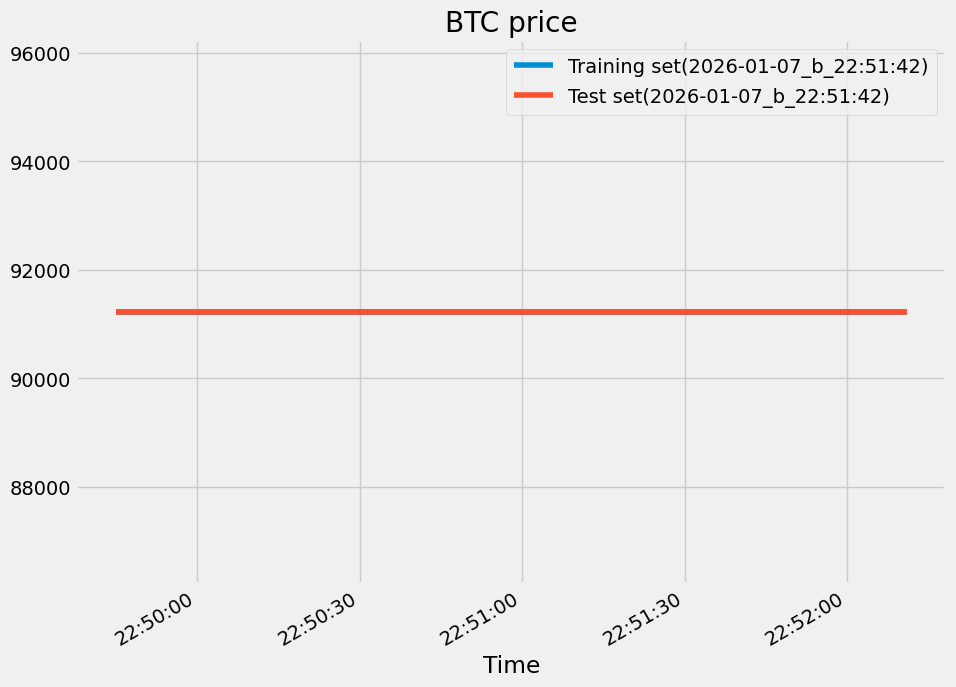

In [5]:
df['High'][:'2026'].plot(figsize=(10,8),legend=True)
df['High']['2026':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2026-01-07_b_22:51:42)','Test set(2026-01-07_b_22:51:42)'])
plt.title('BTC price')
plt.show()

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [7]:
train_set_sc.shape

(122, 1)

In [8]:
x_train = []
y_train = []
for i in range(100,122):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
# LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=50,batch_size=32)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0000e+00
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0000e+00
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0000e+00
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0000e+00
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0000e+00
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0000e+00
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━

In [14]:
df_total = pd.concat((df['High'][:'2020'],df['High']['2021':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(60, 1)

In [15]:
x_test=[]
for i in range(60,122):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (62,) + inhomogeneous part.

In [31]:
return_rmse(test_set,pred_harga)

Root MSE = 2793.7006790044725.
